# Day 3: Moving Average of Flight Delays

## Problem Description

Calculate the 7-day moving average of total flight delays per day from the Airline Delay dataset and visualize the trend.

In [3]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Airline Delay dataset from Kaggle
url = 'mathematical_datasets/flights_sample_3m.csv'
data = pd.read_csv(url)

In [9]:
cols = data.columns
cols

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [13]:
for col in cols:
    print(data.iloc[0:1][col])

0    2019-01-09
Name: FL_DATE, dtype: object
0    United Air Lines Inc.
Name: AIRLINE, dtype: object
0    United Air Lines Inc.: UA
Name: AIRLINE_DOT, dtype: object
0    UA
Name: AIRLINE_CODE, dtype: object
0    19977
Name: DOT_CODE, dtype: int64
0    1562
Name: FL_NUMBER, dtype: int64
0    FLL
Name: ORIGIN, dtype: object
0    Fort Lauderdale, FL
Name: ORIGIN_CITY, dtype: object
0    EWR
Name: DEST, dtype: object
0    Newark, NJ
Name: DEST_CITY, dtype: object
0    1155
Name: CRS_DEP_TIME, dtype: int64
0    1151.0
Name: DEP_TIME, dtype: float64
0   -4.0
Name: DEP_DELAY, dtype: float64
0    19.0
Name: TAXI_OUT, dtype: float64
0    1210.0
Name: WHEELS_OFF, dtype: float64
0    1443.0
Name: WHEELS_ON, dtype: float64
0    4.0
Name: TAXI_IN, dtype: float64
0    1501
Name: CRS_ARR_TIME, dtype: int64
0    1447.0
Name: ARR_TIME, dtype: float64
0   -14.0
Name: ARR_DELAY, dtype: float64
0    0.0
Name: CANCELLED, dtype: float64
0    NaN
Name: CANCELLATION_CODE, dtype: object
0    0.0
Name: DIVERTED

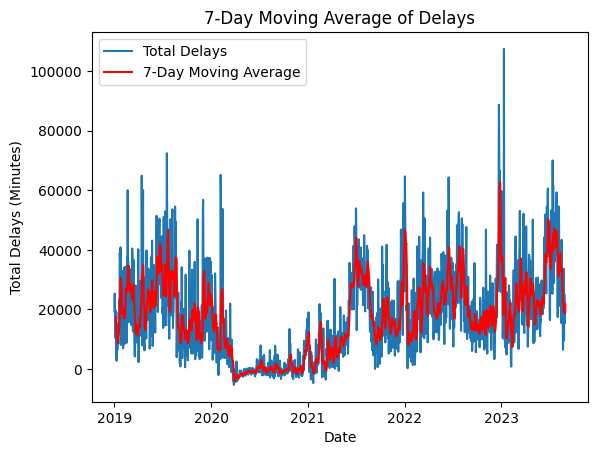

In [14]:
# Aggregate the total delays per day
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'])
daily_delays = data.groupby('FL_DATE')['DEP_DELAY'].sum().reset_index()

# Calculate the 7-day moving average
daily_delays['7-Day MA'] = daily_delays['DEP_DELAY'].rolling(window=7).mean()

# Plot the original data and moving average
plt.plot(daily_delays['FL_DATE'], daily_delays['DEP_DELAY'], label='Total Delays')
plt.plot(daily_delays['FL_DATE'], daily_delays['7-Day MA'], label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Total Delays (Minutes)')
plt.title('7-Day Moving Average of Delays')
plt.legend()
plt.show()